In [2]:
using LightGraphs
using GraphPlot

### 几种生成网络的方法

#### 构造网络，生成只有节点的空网络，然后向里添加边

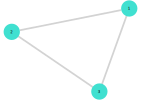

In [2]:
# construct a graph with only vertices and add edge iteratively
G₁ = Graph(3)  

add_edge!(G₁, 1, 2)
add_edge!(G₁, 1, 3)
add_edge!(G₁, 2, 3)

gplot(G₁, nodelabel=1:3)

#### 从邻接矩阵构造网络

In [3]:
A = [
    0 1 1
    1 0 1
    1 1 0
]

G₂ = Graph(A)

@assert G₁ == G₂  # @ assert condition  如果 condition is false，则返回错误信息 AssertionError

#### 生成随机的

In [14]:
G = Graph(4,5)  # 4 nodes and 5 edges

{4, 5} undirected simple Int64 graph

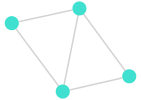

In [15]:
gplot(G)

#### 生成有向网络

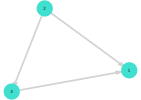

In [5]:
G = DiGraph(3,3)

gplot(G, nodelabel=1:3)

##### neighbors( )  默认为 outneighbors

In [17]:
neighbors(G,2)

2-element Array{Int64,1}:
 1
 3

In [15]:
inneighbors(G,2)

0-element Array{Int64,1}

In [16]:
outneighbors(G,2)

2-element Array{Int64,1}:
 1
 3

##### degree ( ) 默认为 出入和入度的和

In [19]:
degree(G,3)

2

In [20]:
indegree(G,3)

1

In [21]:
outdegree(G,3)

1

#### 自动生成常见网络

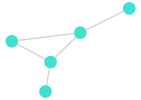

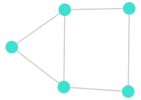

In [24]:
for shape in ["bull", "house"]
    G = smallgraph(shape)
    display(gplot(G))  # gplot() 在 for 循环中不显示，需要用 display()
end

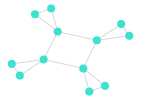

In [29]:
G = CliqueGraph(3,4)

gplot(G)

In [ ]:
# ER随机网络
erdos_renyi(num_node, p)

In [ ]:
# 小世界网络
watts_strogatz(num_node, num_nbr, p)

### 获取现有网络的属性

#### 节点数和边数

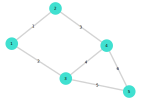

In [30]:
G = smallgraph("house")

nvertices = nv(G)
nedge = ne(G)

gplot(G, nodelabel=1:nvertices, edgelabel=1:nedge)

#### 节点和边的列表

In [35]:
for v in vertices(G)
    println(v)
end

1
2
3
4
5


In [36]:
for e in edges(G)
    println(e)
end

Edge 1 => 2
Edge 1 => 3
Edge 2 => 4
Edge 3 => 4
Edge 3 => 5
Edge 4 => 5


In [37]:
for e in edges(G)
    u, v = src(e), dst(e)
    println("$u - $v")
end

1 - 2
1 - 3
2 - 4
3 - 4
3 - 5
4 - 5


In [38]:
adjacency_matrix(G)

5×5 SparseMatrixCSC{Int64,Int64} with 12 stored entries:
  [2, 1]  =  1
  [3, 1]  =  1
  [1, 2]  =  1
  [4, 2]  =  1
  [1, 3]  =  1
  [4, 3]  =  1
  [5, 3]  =  1
  [2, 4]  =  1
  [3, 4]  =  1
  [5, 4]  =  1
  [3, 5]  =  1
  [4, 5]  =  1

In [39]:
incidence_matrix(G)

5×6 SparseMatrixCSC{Int64,Int64} with 12 stored entries:
  [1, 1]  =  1
  [2, 1]  =  1
  [1, 2]  =  1
  [3, 2]  =  1
  [2, 3]  =  1
  [4, 3]  =  1
  [3, 4]  =  1
  [4, 4]  =  1
  [3, 5]  =  1
  [5, 5]  =  1
  [4, 6]  =  1
  [5, 6]  =  1

In [40]:
laplacian_matrix(G)

5×5 SparseMatrixCSC{Int64,Int64} with 17 stored entries:
  [1, 1]  =  2
  [2, 1]  =  -1
  [3, 1]  =  -1
  [1, 2]  =  -1
  [2, 2]  =  2
  [4, 2]  =  -1
  [1, 3]  =  -1
  [3, 3]  =  3
  [4, 3]  =  -1
  [5, 3]  =  -1
  [2, 4]  =  -1
  [3, 4]  =  -1
  [4, 4]  =  3
  [5, 4]  =  -1
  [3, 5]  =  -1
  [4, 5]  =  -1
  [5, 5]  =  2

### 注意加边、删边操作对序号的影响

#### 加边不会改变节点和边的序号

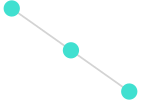

In [45]:
G = Graph()
add_vertices!(G, 3)
add_edge!(G, 1,2)
add_edge!(G, 2,3)
gplot(G)

#### 删边会改变序号

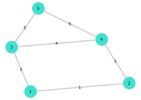

In [46]:
# 删除节点的过程中，首先是删除节点，然后被删除节点的序号赋给最后添加的节点
G = smallgraph("house")

gplot(G, nodelabel=1:nv(G), edgelabel=1:ne(G))

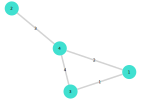

In [49]:
rem_vertex!(G, 1)

gplot(G, nodelabel=1:nv(G), edgelabel=1:ne(G))

### Watts cascade model

In [1]:
for pkg in ["LightGraphs", "Plots", "GR"]
    Pkg.add(pkg)
end

INFO: Package LightGraphs is already installed
INFO: METADATA is out-of-date — you may not have the latest version of LightGraphs
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Package Plots is already installed
INFO: METADATA is out-of-date — you may not have the latest version of Plots
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Package GR is already installed
INFO: METADATA is out-of-date — you may not have the latest version of GR
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [2]:
using Distributions
using LightGraphs
using Plots; gr()

Plots.GRBackend()

In [3]:
# compute the fraction of engaged neighbors
function fraction_engaged(node::Int,
                          G::LightGraphs.SimpleGraphs.SimpleGraph,
                          node_status::BitVector)
    num_engaged_neighbors = 0
    for nbr in neighbors(G, node)
        if node_status[nbr] == true
            num_engaged_neighbors += 1
        end
    end
    return num_engaged_neighbors/length(neighbors(G, node))
end

fraction_engaged (generic function with 1 method)

In [8]:
# update one time in any arbitrary order
# 这里一个节点更新之后，马上会影响到其他节点，不必等到本轮全部结束
function update_node_status!(G::LightGraphs.SimpleGraphs.SimpleGraph,
                             node_status::BitVector,
                             threshold::Vector{Float64})
    for node in shuffle(vertices(G))
        if node_status[node] == false
            if fraction_engaged(node, G, node_status) > threshold[node]
                node_status[node] = true
            end
        end
    end
    
    return nothing
end

update_node_status! (generic function with 1 method)

In [19]:
# many repreats of simultion
# only one seed is allowed
# return the num of engaged in each realization
function diffusion_simulation(n::Int, # num of nodes in graph
                              z::Int, # average degree
                              threshold::Vector{Float64},
                              T::Int, # steps in each simulation
                              n_realizations::Int)
    output = Vector{Float64}(n_realizations)
    beta = z/n
    
    for r in 1:n_realizations
        G = watts_strogatz(n, z, beta)
        node_status = falses(nv(G))
        node_status[sample(vertices(G))] = true
        
        for _ in 1:T
            update_node_status!(G, node_status, threshold)
        end        
        output[r] = sum(node_status)
    end
    
    return output
end        

diffusion_simulation (generic function with 1 method)

In [21]:
const N = 10^4
z, threshold = 5, 0.18
@time data = diffusion_simulation(N, z, fill(threshold, N), 50, 100);

  4.455141 seconds (13.60 M allocations: 932.834 MiB, 5.70% gc time)


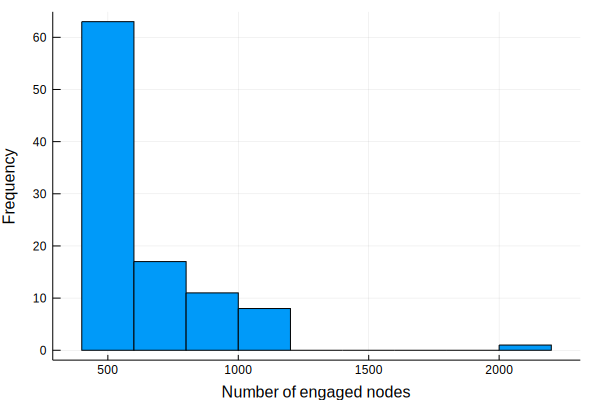

In [22]:
histogram(data, xlab="Number of engaged nodes", ylab="Frequency", legend=false)

In [31]:
const N = 10^4
z, threshold = 6, 0.18
@time data = diffusion_simulation(N, z, fill(threshold, N), 50, 100);

  6.630075 seconds (20.39 M allocations: 1.191 GiB, 5.42% gc time)


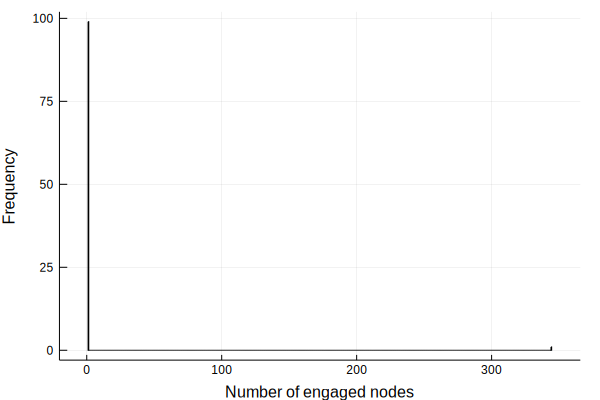

In [32]:
histogram(data, xlab="Number of engaged nodes", ylab="Frequency", legend=false)

### influencer

In [1]:
using Distributions
using LightGraphs
using Plots
using DataFrames
gr(size = (800, 400), alpha = 0.8)

Plots.GRBackend()

In [4]:
N = 10^4   # num of nodes

zs = [mean(degree(barabasi_albert(N, k))) for k in [2, 6, 12, 16]]

4-element Array{Float64,1}:
  3.9992
 11.9928
 23.9712
 31.9488

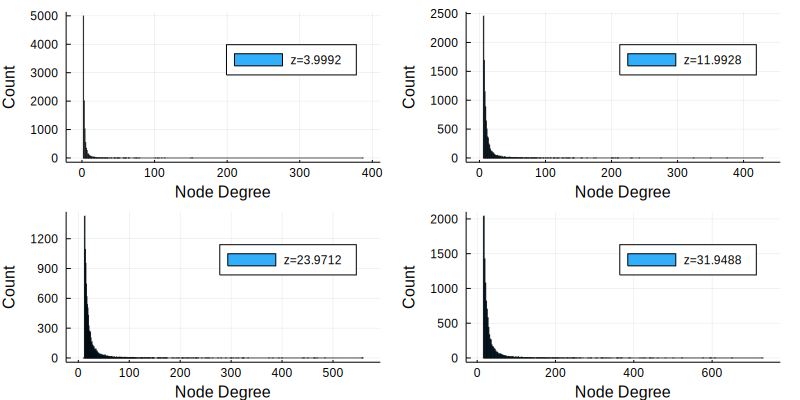

In [6]:
p1 = histogram(degree(barabasi_albert(N, 2)), label="z=$(zs[1])")
p2 = histogram(degree(barabasi_albert(N, 6)), label="z=$(zs[2])")
p3 = histogram(degree(barabasi_albert(N, 12)), label="z=$(zs[3])")
p4 = histogram(degree(barabasi_albert(N, 16)), label="z=$(zs[4])")

plot(p1, p2, p3, p4, layout=4, xlab = "Node Degree", ylab="Count")

In [5]:
function fraction_engaged(node::Int,
                          G::LightGraphs.SimpleGraphs.SimpleGraph,
                          node_status::BitArray)
    num_engaged_neighbors = 0
    for nbr in neighbors(G, node)
        if node_status[nbr] == true
            num_engaged_neighbors += 1
        end
    end
    
    return num_engaged_neighbors/length(neighbors(G, node))  # 只能这样获得邻居数目？
end

fraction_engaged (generic function with 1 method)

In [12]:
function update_node_status(G::LightGraphs.SimpleGraphs.SimpleGraph,
                            node_status::BitArray,
                            threshold::Vector{Float64}) # == Array{Float64, 1}
    old_status = copy(node_status)
    
    for node in shuffle(vertices(G))
        if node_status[node] == false
            if fraction_engaged(node, G, node_status) > threshold[node]
                node_status[node] = true
            end
        end
    end
    
    return node_status, old_status
end          

update_node_status (generic function with 1 method)

In [19]:
function diffusion_simulation(n::Int,
                              z::Int,
                              threshold::Vector{Float64},
                              n_realizations::Int)
    output = Matrix{Int}(n_realizations, 4)
    k = floor(Int, z/2) # 每新加入一个点，增加 2k 个度，如果希望平均度为 z，则应令 k 为 z/2，取整
    
    for r in 1:n_realizations
        G = barabasi_albert(n, k)
        
        # random seeding
        node_status = falses(nv(G))
        node_status[sample(vertices(G))] = true
        t = 1
        new_node_status, node_status = update_node_status(G, node_status, threshold)
        while new_node_status != node_status
            node_status = new_node_status
            new_node_status, node_status = update_node_status(G, node_status, threshold)
            t += 1
        end
        random_activations, random_timesteps = sum(node_status), t
        
        # degree seeding
        node_status = falses(nv(G))
        seed = sortperm(degree_centrality(G), rev=true)[1] # sortperm 返回 index
        # degree_centrality 返回的是归一化的值，不是度！
        node_status[seed] = true
        t = 1
        new_node_status, node_status = update_node_status(G, node_status, threshold)
        while new_node_status != node_status
            node_status = new_node_status
            new_node_status, node_status = update_node_status(G, node_status, threshold)
            t += 1
        end
        influential_activations, influential_timesteps = sum(node_status), t
        
        output[r, 1:end] = [random_activations, random_timesteps, influential_activations, influential_timesteps]
        println("realization = $r")
    end
    
    return output
end    
        

diffusion_simulation (generic function with 1 method)

In [ ]:
N = 10^4
@time data1 = diffusion_simulation(N, 4, fill(0.1, N), 100)

### strong ties and weak ties

In [33]:
# strong ties 就是对应完全图中的连边，weak tie 是两个不同的完全图之间的连边
function initialize_network(n_nodes::Int, n_strong_ties::Int)  # Int 对应系统的字节长度 = Int64
    G = [CompleteGraph(n_strong_ties) for g in 1:floor(n_nodes/n_strong_ties)]
    return G
end    
# G 实际上是一系列完全图的 list

initialize_network (generic function with 1 method)

In [35]:
# 开始时，把所有完全图中的节点status设为false
function reset_node_status(G::Vector{LightGraphs.SimpleGraphs.SimpleGraph{Int}})
    node_status = [falses(nv(g)) for g in G]
    return node_status
end

reset_node_status (generic function with 1 method)

In [36]:
function count_active_str_ties(G::Vector{LightGraphs.SimpleGraphs.SimpleGraph{Int}},
                               node_network_id::Int,
                               node::Int,
                               node_status::Vector{BitVector})
    n_active_str_ites = sum([node_status[node_network_id][nbr] for nbr in neighbors(G[node_network_id], node)])
    
    return n_active_str_ites
end

count_active_str_ties (generic function with 1 method)

In [54]:
function random_meetings(G::Vector{LightGraphs.SimpleGraphs.SimpleGraph{Int}},
                         node_network_id::Int,
                         node::Int,
                         node_status::Vector{BitVector},
                         n_weak_ties::Int)
    all_network_ids = 1:length(G)
    other_network_ids = all_network_id[all_network_id .!= node_network_id]
    possible_weak_ties = []
    nsamples = 1
    
    while nsample < n_weak_ties
        rand_network_id = sample(other_network_ids)
        rand_nbr = sample(vertices(G[rand_network_id]))
        
        if ! ((rand_nework_id, rand_nbr) in possible_weak_ties)
            push!(possbile_weak_ties, (rand_network_id, rand_nbr))
            nsamples += 1
        end
    end
    
    n_active_weak_ties = sum([node_status[network_id][weak_tie]  for (network_id, weak_tie) in possible_weak_ties])
    
    return n_active_weak_ties
end

random_meetings (generic function with 1 method)

In [71]:
function update_status!(G::Vector{LightGraphs.SimpleGraphs.SimpleGraph{Int}},
                        node_status::Vector{BitVector},
                        n_weak_ties::Int,
                        alpha::Float64, beta_w::Float64, beta_s::Float64)

    for node_network_id in shuffle(1:length(G))
        for node in shuffle(vertices(G[node_network_id]))
            n_active_str_ties = count_active_str_ties(G, node_network_id, node, node_status)
            n_active_wk_ties = random_meetings(G, node_network_id, node, node_status, n_weak_ties)

            activation_prob = 1 - (1 - alpha) * (1 - beta_w)^n_active_wk_ties * (1 - beta_s)^n_active_str_ties

            if rand(Uniform()) < activation_prob
                node_status[node_network_id][node] = true
            end
        end
    end

    return nothing
end

update_status! (generic function with 1 method)